In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
%rm -rf ./my_logs/

import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Data Import and Pre-processing

In [3]:
import pandas as pd
import numpy as np

In [4]:
creepy = pd.read_pickle('./pickles/creepy.pickle')
noncreepy = pd.read_pickle('./pickles/noncreepy.pickle')

In [5]:
creepy

,index,id,title,selftext,score,sum_vec,log_(score+min+0.01),sum_vec_with_log_prepended,selftext_sents_count,vec
0,0,gxsa0i,Do NOT Open Your Eyes... (Pt. 1),This is the only rule of our household. If you...,1,"[2.940986, -5.617336, 11.896912, -15.436118, -...",0.698135,"[0.6981347, 2.940986, -5.617336, 11.896912, -1...",38,"[0.6981347, 0.077394366, -0.14782463, 0.313076..."
1,1,gxs6jf,Do NOT open your eyes. (The Beginning),This is the only rule of our household. If you...,1,"[2.940986, -5.617336, 11.896912, -15.436118, -...",0.698135,"[0.6981347, 2.940986, -5.617336, 11.896912, -1...",38,"[0.6981347, 0.077394366, -0.14782463, 0.313076..."
2,2,gxrytp,My Best Friend Saw Bugs Under His Skin,It is hard for me to talk about my old friend ...,1,"[-19.201273, -13.715499, 24.393753, -33.97739,...",0.698135,"[0.6981347, -19.201273, -13.715499, 24.393753,...",81,"[0.6981347, -0.23705275, -0.16932714, 0.301157..."
3,3,gxrnj7,"I picked up a hitchhiker by mistake, now he's ...",They say the devil is in the details. Well th...,1,"[-60.77887, -33.726135, 119.47121, -95.021385,...",0.698135,"[0.6981347, -60.77887, -33.726135, 119.47121, ...",429,"[0.6981347, -0.14167568, -0.0786157, 0.2784876..."
4,4,gxrm8v,I'm tasked with killing nameless things out in...,“Any sign of ‘em yet?” \n\nI continued staring...,1,"[-22.785084, 14.806147, 26.129469, -24.832222,...",0.698135,"[0.6981347, -22.785084, 14.806147, 26.129469, ...",177,"[0.6981347, -0.12872928, 0.083650544, 0.147624..."
...,...,...,...,...,...,...,...,...,...,...
15367,15367,eihp0m,Hylophobia,*There is no cure for trauma. Once it enters t...,1,"[-51.169456, -5.836507, 70.7862, -111.05138, 7...",0.698135,"[0.6981347, -51.169456, -5.836507, 70.7862, -1...",447,"[0.6981347, -0.11447306, -0.013057062, 0.15835..."
15368,15368,eihmg7,I adopted my late sisters orphaned child. This...,"I knew Persephone would need time to adjust, b...",1,"[-22.327501, -34.563572, 39.197514, -72.437645...",0.698135,"[0.6981347, -22.327501, -34.563572, 39.197514,...",246,"[0.6981347, -0.0907622, -0.14050232, 0.1593394..."
15369,15369,eihgtp,My first paranormal experience!!,"This isnt much, but this is surely the first u...",1,"[-4.7810946, 0.12821773, 2.941056, -3.949329, ...",0.698135,"[0.6981347, -4.7810946, 0.12821773, 2.941056, ...",12,"[0.6981347, -0.39842454, 0.010684811, 0.245088..."
15370,15370,eigzgj,I met the demon under my bed... Its not what I...,"Okay. for context, this story started about a ...",1,"[-1.7662485, -4.471965, 8.116567, -12.409156, ...",0.698135,"[0.6981347, -1.7662485, -4.471965, 8.116567, -...",30,"[0.6981347, -0.05887495, -0.1490655, 0.2705522..."


In [6]:
creepy_sum_vec_with_log_prepended = creepy.loc[:,'vec'].copy()
noncreepy_sum_vec_with_log_prepended = noncreepy.loc[:,'vec'].copy()

In [7]:
creepy_features = pd.DataFrame(creepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
creepy_labels = np.ones(len(creepy_features))

In [8]:
noncreepy_features = pd.DataFrame(noncreepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
noncreepy_labels = np.zeros(len(noncreepy_features))

In [9]:
features = np.concatenate((creepy_features, noncreepy_features))
labels = np.concatenate((creepy_labels, noncreepy_labels))
print(features, labels)

[[ 0.69813472  0.07739437 -0.14782463 ... -0.12086978  0.00944329
  -0.23866224]
 [ 0.69813472  0.07739437 -0.14782463 ... -0.12086978  0.00944329
  -0.23866224]
 [ 0.69813472 -0.23705275 -0.16932714 ...  0.22444913 -0.20354605
  -0.08335517]
 ...
 [ 0.69813472 -0.06071103  0.02235722 ...  0.10523307 -0.29174414
  -0.14749481]
 [ 0.69813472  0.14904401 -0.10234425 ... -0.13638787  0.24349198
   0.0390255 ]
 [ 0.69813472 -0.24383056 -0.36296186 ...  0.32824722 -0.14198837
  -0.42668518]] [1. 1. 1. ... 0. 0. 0.]


In [10]:
print(features.shape, labels.shape)

(37846, 769) (37846,)


In [11]:
from sklearn.utils import shuffle

features, labels = shuffle(features, labels)
print(features, labels)

[[ 0.69813472 -0.19883807 -0.22665226 ... -0.04891156 -0.0747883
  -0.06457612]
 [ 0.69813472 -0.1776481  -0.16981587 ... -0.14637184 -0.20224912
  -0.12996532]
 [ 0.69813472 -0.11099102 -0.04931189 ... -0.06447925 -0.14695886
  -0.22092812]
 ...
 [ 0.69813472  0.21462333  0.32432187 ... -0.03440503 -0.02993847
   0.14624037]
 [ 0.69813472 -0.02852128 -0.06269496 ... -0.51838142 -0.16961524
  -0.4718844 ]
 [ 3.87140942 -0.03308617 -0.04696087 ... -0.04786642  0.02133932
  -0.13769732]] [1. 0. 0. ... 0. 0. 1.]


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
print(scaled_features, labels)

[[0.         0.44657878 0.38527918 ... 0.48921911 0.50498653 0.42587091]
 [0.         0.45263432 0.40425717 ... 0.45892448 0.4587431  0.40766532]
 [0.         0.47168316 0.44449414 ... 0.48438004 0.47880269 0.38233956]
 ...
 [0.         0.56473519 0.56925259 ... 0.49372834 0.52125828 0.48456622]
 [0.         0.49525084 0.44002546 ... 0.34328873 0.47058284 0.31246858]
 [0.38915611 0.49394632 0.44527916 ... 0.48954399 0.53986212 0.40551258]] [1. 0. 0. ... 0. 0. 1.]


- [x] 70% train, 15% val, 15% test
 - Train: 26500
 - Valid: 5677
 - Test: 5669
- [ ] 80% train, 10% val, 10% test
- [ ] 60% train, 20% val, 20% test

In [13]:
scaled_features[:,0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.38915611])

In [14]:
X_train, X_valid, X_test = scaled_features[:26500], scaled_features[26500:26500+5677], scaled_features[26500+5677:]
y_train, y_valid, y_test = labels[:26500], labels[26500:26500+5677], labels[26500+5677:]

In [15]:
import tensorflow as tf
from tensorflow import keras

# Model here

In [16]:
model = keras.Sequential([
#     keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
    keras.layers.Dropout(0.1),
#     keras.layers.Dense(units = 256, activation = 'relu'),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dense(units = 32, activation = 'relu'),
    keras.layers.Dense(units = 16, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid') # here the units must be 1 in order for binary classifications to work
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 303)               233310    
_________________________________________________________________
dropout (Dropout)            (None, 303)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               38912     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [18]:
model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=0.000959, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])

In [19]:
import os
root_logdir = os.path.join(os.curdir, "tensorboard_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir my_logs

Epoch 1/30
  1/829 [..............................] - ETA: 0s - loss: 0.6987 - accuracy: 0.4688WARNING:tensorflow:From /Users/anthony/Documents/GitHub/Research-Mapping-Uncanny-Valley/.venv/creepyvenv/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
829/829 [==============================] - 2s 3ms/step - loss: 0.4138 - accuracy: 0.7987 - val_loss: 0.2936 - val_accuracy: 0.8846
Epoch 2/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2887 - accuracy: 0.8802 - val_loss: 0.3585 - val_accuracy: 0.8346
Epoch 3/30
829/829 [==============================] - 2s 2ms/step - loss: 0.3584 - accuracy: 0.8415 - val_loss: 0.2842 - val_accuracy: 0.9014
Epoch 4/30
829/829 [==============================] - 2s 2ms/step - loss: 0.3365 - accuracy: 0.8586 - val_loss: 0.2498 - val_accuracy: 0.9142


Reusing TensorBoard on port 6006 (pid 39995), started 4 days, 5:53:51 ago. (Use '!kill 39995' to kill it.)

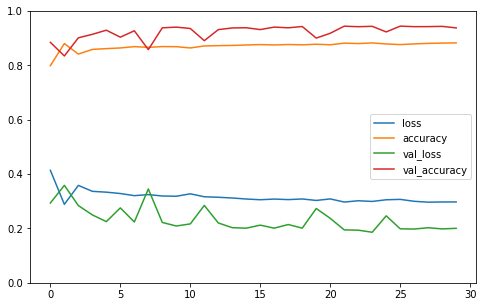

In [20]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()


In [21]:
model.evaluate(X_test, y_test)

178/178 [==============================] - 0s 980us/step - loss: 0.2178 - accuracy: 0.9266


[0.21782466769218445, 0.9266184568405151]

In [22]:
model.save('./models/self-tuned-model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/self-tuned-model/assets


# Keras Tuner

In [23]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import time

In [24]:
kt.__version__

'1.0.1'

In [25]:
LOG_DIR = f"./keras_tuner_logs/{int(time.time())}"

In [29]:
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 256-512 step 32
    hp_input_units = hp.Int('input_units', min_value = 256, max_value = 512, step = 8)
    model.add(Dense(units = hp_input_units, input_shape = (769,), activation = 'relu'))
    
    for i in range(hp.Int("n_layers", min_value = 1, max_value = 5)):
        # Tune the number of units in the each Dense layer
        # Choose an optimal value between 8-512 step 8
        hp_dense_i_units = hp.Int(f"dense_{i}_units", min_value = 8, max_value = 512, step = 8)
        model.add(Dense(units = hp_dense_i_units, activation = 'relu'))
        
        # Tune the number of dropout rate between Dense layers
        # Choose an optimal value between 0-0.5 step 0.1
        hp_dense_i_dropout_rate = hp.Float(f"dense_{i}_dropout_rate", min_value = 0, max_value = 0.5, step = 0.1)
        model.add(Dropout(hp_dense_i_dropout_rate))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))# here the units must be 1 in order for binary classifications to work
    
    # Tune the number of dropout rate between Dense layers
    # Choose an optimal value between 0.0008-0.001 step 0.00002
    # 10 numbers
    hp_lr_rate = hp.Float(f"optimizer_lr_rate", min_value = 0.0008, max_value = 0.001, step = 0.00002)
    model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=hp_lr_rate, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])
    
    return model

In [30]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 5,
    executions_per_trial = 3,
    directory = LOG_DIR
)

INFO:tensorflow:Reloading Oracle from existing project ./keras_tuner_logs/1604012547/untitled_project/oracle.json


In [31]:
tuner.search(x = X_train,
             y = y_train,
             epochs = 30,
#              batch_size = 64,
             validation_data = (X_valid, y_valid))

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.65 - ETA: 2s - loss: 0.7061 - accuracy: 0.56 - ETA: 2s - loss: 0.6915 - accuracy: 0.58 - ETA: 2s - loss: 0.6878 - accuracy: 0.59 - ETA: 2s - loss: 0.6821 - accuracy: 0.59 - ETA: 2s - loss: 0.6807 - accuracy: 0.59 - ETA: 2s - loss: 0.6802 - accuracy: 0.59 - ETA: 2s - loss: 0.6799 - accuracy: 0.58 - ETA: 2s - loss: 0.6795 - accuracy: 0.58 - ETA: 2s - loss: 0.6796 - accuracy: 0.58 - ETA: 2s - loss: 0.6775 - accuracy: 0.59 - ETA: 2s - loss: 0.6752 - accuracy: 0.59 - ETA: 2s - loss: 0.6745 - accuracy: 0.59 - ETA: 2s - loss: 0.6734 - accuracy: 0.59 - ETA: 2s - loss: 0.6693 - accuracy: 0.59 - ETA: 2s - loss: 0.6629 - accuracy: 0.60 - ETA: 1s - loss: 0.6560 - accuracy: 0.61 - ETA: 1s - loss: 0.6478 - accuracy: 0.61 - ETA: 1s - loss: 0.6395 - accuracy: 0.62 - ETA: 1s - loss: 0.6259 - accuracy: 0.63 - ETA: 1s - loss: 0.6127 - accuracy: 0.65 - ETA: 1s - loss: 0.6041 - accuracy: 0.65 - ETA: 1s - loss: 0.5976

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.8147 - accuracy: 0.37 - ETA: 3s - loss: 0.7518 - accuracy: 0.52 - ETA: 4s - loss: 0.7287 - accuracy: 0.54 - ETA: 4s - loss: 0.7312 - accuracy: 0.53 - ETA: 5s - loss: 0.7251 - accuracy: 0.53 - ETA: 5s - loss: 0.7156 - accuracy: 0.54 - ETA: 4s - loss: 0.7175 - accuracy: 0.53 - ETA: 4s - loss: 0.7144 - accuracy: 0.54 - ETA: 4s - loss: 0.7075 - accuracy: 0.55 - ETA: 4s - loss: 0.7027 - accuracy: 0.56 - ETA: 4s - loss: 0.7006 - accuracy: 0.56 - ETA: 4s - loss: 0.6973 - accuracy: 0.56 - ETA: 4s - loss: 0.6936 - accuracy: 0.57 - ETA: 3s - loss: 0.6902 - accuracy: 0.57 - ETA: 3s - loss: 0.6862 - accuracy: 0.57 - ETA: 3s - loss: 0.6772 - accuracy: 0.57 - ETA: 3s - loss: 0.6649 - accuracy: 0.58 - ETA: 3s - loss: 0.6527 - accuracy: 0.59 - ETA: 3s - loss: 0.6457 - accuracy: 0.60 - ETA: 3s - loss: 0.6387 - accuracy: 0.61 - ETA: 3s - loss: 0.6269 - accuracy: 0.62 - ETA: 3s - loss: 0.6182 - accuracy: 0.63 - ETA: 3s - loss: 0.6066

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7009 - accuracy: 0.40 - ETA: 4s - loss: 0.6955 - accuracy: 0.56 - ETA: 4s - loss: 0.6911 - accuracy: 0.57 - ETA: 4s - loss: 0.6903 - accuracy: 0.57 - ETA: 4s - loss: 0.6930 - accuracy: 0.56 - ETA: 4s - loss: 0.6924 - accuracy: 0.56 - ETA: 4s - loss: 0.6907 - accuracy: 0.56 - ETA: 4s - loss: 0.6893 - accuracy: 0.56 - ETA: 4s - loss: 0.6904 - accuracy: 0.56 - ETA: 4s - loss: 0.6881 - accuracy: 0.57 - ETA: 4s - loss: 0.6844 - accuracy: 0.58 - ETA: 4s - loss: 0.6840 - accuracy: 0.58 - ETA: 4s - loss: 0.6841 - accuracy: 0.57 - ETA: 4s - loss: 0.6834 - accuracy: 0.57 - ETA: 4s - loss: 0.6829 - accuracy: 0.58 - ETA: 3s - loss: 0.6825 - accuracy: 0.58 - ETA: 3s - loss: 0.6823 - accuracy: 0.58 - ETA: 3s - loss: 0.6810 - accuracy: 0.58 - ETA: 3s - loss: 0.6799 - accuracy: 0.58 - ETA: 3s - loss: 0.6789 - accuracy: 0.58 - ETA: 3s - loss: 0.6779 - accuracy: 0.59 - ETA: 3s - loss: 0.6779 - accuracy: 0.59 - ETA: 3s - loss: 0.6775

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.46 - ETA: 3s - loss: 0.6913 - accuracy: 0.51 - ETA: 3s - loss: 0.7118 - accuracy: 0.49 - ETA: 4s - loss: 0.7001 - accuracy: 0.52 - ETA: 4s - loss: 0.6935 - accuracy: 0.54 - ETA: 4s - loss: 0.6908 - accuracy: 0.55 - ETA: 4s - loss: 0.6894 - accuracy: 0.56 - ETA: 4s - loss: 0.6857 - accuracy: 0.56 - ETA: 4s - loss: 0.6815 - accuracy: 0.57 - ETA: 4s - loss: 0.6819 - accuracy: 0.58 - ETA: 4s - loss: 0.6802 - accuracy: 0.58 - ETA: 4s - loss: 0.6766 - accuracy: 0.58 - ETA: 3s - loss: 0.6673 - accuracy: 0.59 - ETA: 3s - loss: 0.6636 - accuracy: 0.58 - ETA: 3s - loss: 0.6578 - accuracy: 0.59 - ETA: 3s - loss: 0.6457 - accuracy: 0.61 - ETA: 3s - loss: 0.6298 - accuracy: 0.62 - ETA: 3s - loss: 0.6157 - accuracy: 0.63 - ETA: 3s - loss: 0.6110 - accuracy: 0.64 - ETA: 3s - loss: 0.6071 - accuracy: 0.64 - ETA: 3s - loss: 0.5981 - accuracy: 0.65 - ETA: 3s - loss: 0.5849 - accuracy: 0.66 - ETA: 3s - loss: 0.5733

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.37 - ETA: 4s - loss: 0.6911 - accuracy: 0.58 - ETA: 4s - loss: 0.6890 - accuracy: 0.57 - ETA: 4s - loss: 0.6961 - accuracy: 0.54 - ETA: 6s - loss: 0.6943 - accuracy: 0.54 - ETA: 6s - loss: 0.6942 - accuracy: 0.53 - ETA: 5s - loss: 0.6919 - accuracy: 0.55 - ETA: 5s - loss: 0.6915 - accuracy: 0.56 - ETA: 5s - loss: 0.6906 - accuracy: 0.56 - ETA: 5s - loss: 0.6903 - accuracy: 0.56 - ETA: 4s - loss: 0.6877 - accuracy: 0.57 - ETA: 4s - loss: 0.6870 - accuracy: 0.57 - ETA: 4s - loss: 0.6851 - accuracy: 0.57 - ETA: 4s - loss: 0.6846 - accuracy: 0.57 - ETA: 4s - loss: 0.6826 - accuracy: 0.58 - ETA: 4s - loss: 0.6813 - accuracy: 0.58 - ETA: 4s - loss: 0.6820 - accuracy: 0.58 - ETA: 4s - loss: 0.6821 - accuracy: 0.58 - ETA: 4s - loss: 0.6811 - accuracy: 0.58 - ETA: 4s - loss: 0.6801 - accuracy: 0.58 - ETA: 4s - loss: 0.6800 - accuracy: 0.58 - ETA: 4s - loss: 0.6806 - accuracy: 0.58 - ETA: 4s - loss: 0.6807

INFO:tensorflow:Oracle triggered exit


In [32]:
tuner.get_best_hyperparameters(num_trials=1)

In [33]:
# tuner.results_summery()

In [34]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               369600    
_________________________________________________________________
dense_1 (Dense)              (None, 312)               150072    
_________________________________________________________________
dropout (Dropout)            (None, 312)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2504      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0

In [35]:
model = tuner.get_best_models()[0]

In [36]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir my_logs

Epoch 1/30
829/829 [==============================] - ETA: 41s - loss: 0.1521 - accuracy: 0.9420 - ETA: 21s - loss: 0.1192 - accuracy: 0.953 - ETA: 14s - loss: 0.1210 - accuracy: 0.951 - ETA: 12s - loss: 0.1209 - accuracy: 0.949 - ETA: 10s - loss: 0.1354 - accuracy: 0.944 - ETA: 8s - loss: 0.1398 - accuracy: 0.945 - ETA: 7s - loss: 0.1388 - accuracy: 0.94 - ETA: 6s - loss: 0.1338 - accuracy: 0.94 - ETA: 5s - loss: 0.1322 - accuracy: 0.95 - ETA: 5s - loss: 0.1295 - accuracy: 0.95 - ETA: 5s - loss: 0.1265 - accuracy: 0.95 - ETA: 4s - loss: 0.1231 - accuracy: 0.95 - ETA: 4s - loss: 0.1229 - accuracy: 0.95 - ETA: 3s - loss: 0.1238 - accuracy: 0.95 - ETA: 3s - loss: 0.1251 - accuracy: 0.95 - ETA: 3s - loss: 0.1244 - accuracy: 0.95 - ETA: 3s - loss: 0.1229 - accuracy: 0.95 - ETA: 3s - loss: 0.1222 - accuracy: 0.95 - ETA: 3s - loss: 0.1211 - accuracy: 0.95 - ETA: 2s - loss: 0.1205 - accuracy: 0.95 - ETA: 2s - loss: 0.1182 - accuracy: 0.95 - ETA: 2s - loss: 0.1165 - accuracy: 0.95 - ETA: 2s - 

Reusing TensorBoard on port 6006 (pid 39995), started 4 days, 6:46:08 ago. (Use '!kill 39995' to kill it.)

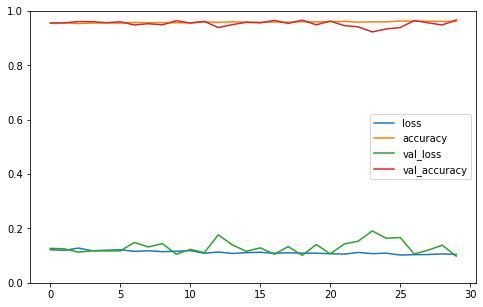

In [37]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()

In [38]:
model.evaluate(X_test, y_test)

178/178 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 1.00 - ETA: 0s - loss: 0.0778 - accuracy: 0.97 - ETA: 0s - loss: 0.0748 - accuracy: 0.97 - ETA: 0s - loss: 0.0858 - accuracy: 0.97 - ETA: 0s - loss: 0.0970 - accuracy: 0.96 - ETA: 0s - loss: 0.0986 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9638


[0.10418768972158432, 0.9638383984565735]

In [39]:
model.save('./models/keras-tuner-tuned-model')

INFO:tensorflow:Assets written to: ./models/keras-tuner-tuned-model/assets


# Real-world Test (r/shortscarystories and r/self)

In [49]:
import numpy as np
from tensorflow import keras
model = keras.models.load_model('./models/self-tuned-model')
# model = keras.models.load_model('./models/keras-tuner-tuned-model')

In [50]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

text_creepy = """
Ghosts are in my house. I feel scary.
"""

text_non_creepy = """
Apples can grow from 10 to 30 feet tall and nearly as wide.
"""

import spacy

# spacy.prefer_gpu()
# Must return True for GPU to work

nlp = spacy.load('en_core_web_lg')

# need nlp and model
def sum_vec(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    comment_vec = sbert_model.encode(sentences)
    return np.sum(comment_vec, axis = 0)

In [51]:
from sklearn.preprocessing import MinMaxScaler
creepy_vec = np.concatenate(([np.log(1310+1+0.01)],sum_vec(text_creepy)))
non_creepy_vec = np.concatenate(([np.log(1136+1+0.01)],sum_vec(text_non_creepy)))
vecs = np.array([creepy_vec, non_creepy_vec])
vecs

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_vecs = scaler.fit_transform(vecs)

model.predict(scaled_vecs)

array([[0.01365885],
       [0.01190263]], dtype=float32)

In [63]:
model

Failed

In [2]:
import spacy

In [4]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_non_creepy)
for idx, sents in enumerate(doc.sents):
    pass
print(idx)

3


In [63]:
from tensorflow import keras
model = keras.models.load_model('./models/keras-tuner-tuned-model/')

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 352)               271040    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               141200    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 412,641
Trainable params: 412,641
Non-trainable params: 0
_________________________________________________________________


In [65]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir my_logs

Epoch 1/30
  1/829 [..............................] - ETA: 0s - loss: 0.2395 - accuracy: 0.9375WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0049s vs `on_train_batch_end` time: 0.0382s). Check your callbacks.


829/829 [==============================] - ETA: 14s - loss: 0.2834 - accuracy: 0.906 - ETA: 4s - loss: 0.1354 - accuracy: 0.954 - ETA: 3s - loss: 0.1215 - accuracy: 0.95 - ETA: 3s - loss: 0.1377 - accuracy: 0.95 - ETA: 2s - loss: 0.1403 - accuracy: 0.95 - ETA: 2s - loss: 0.1451 - accuracy: 0.95 - ETA: 2s - loss: 0.1535 - accuracy: 0.94 - ETA: 2s - loss: 0.1599 - accuracy: 0.94 - ETA: 2s - loss: 0.1584 - accuracy: 0.94 - ETA: 2s - loss: 0.1550 - accuracy: 0.94 - ETA: 2s - loss: 0.1538 - accuracy: 0.94 - ETA: 2s - loss: 0.1481 - accuracy: 0.95 - ETA: 2s - loss: 0.1485 - accuracy: 0.95 - ETA: 2s - loss: 0.1513 - accuracy: 0.95 - ETA: 1s - loss: 0.1560 - accuracy: 0.94 - ETA: 1s - loss: 0.1548 - accuracy: 0.94 - ETA: 1s - loss: 0.1526 - accuracy: 0.94 - ETA: 1s - loss: 0.1553 - accuracy: 0.94 - ETA: 1s - loss: 0.1534 - accuracy: 0.94 - ETA: 1s - loss: 0.1517 - accuracy: 0.94 - ETA: 1s - loss: 0.1508 - accuracy: 0.94 - ETA: 1s - loss: 0.1504 - accuracy: 0.95 - ETA: 1s - loss: 0.1500 - accur

Reusing TensorBoard on port 6006 (pid 39995), started 2 days, 9:03:45 ago. (Use '!kill 39995' to kill it.)